In [55]:
import numpy as np
import math
from math import factorial

In [101]:
"""a) Write a python function predD(nTotal, nWhite) that returns the posterior over
the number of white balls in the bag for Davina’s model, given a sample of size
nTotal, of which nWhite are white. Your function should return a vector of length
11 where the ith element is the probability that the ball contains i white balls.
"""

def combination(n, p):
    
    return factorial(n)/(factorial(p)*factorial(n-p))    
    
def predD(nTotal, nWhite):
    
    prior = np.array([1/11,1/11,1/11,1/11,1/11,1/11,1/11,1/11,1/11,1/11,1/11])
    likelihood =[]
    for i in range(11):
        likelihood.append(combination(nTotal, nWhite) * np.power(i/10, nWhite) * np.power(1-i/10, nTotal-nWhite))
    evidence = np.sum(likelihood*prior)
    posterior = (likelihood * prior) / evidence
    return posterior

In [102]:
def evidenceD(nTotal, nWhite):
    
    prior = np.array([1/11,1/11,1/11,1/11,1/11,1/11,1/11,1/11,1/11,1/11,1/11])
    likelihood =[]
    for i in range(11):
        likelihood.append(combination(nTotal, nWhite) * np.power(i/11, nWhite) * np.power(1-i/11, nTotal-nWhite))
    evidence = np.sum(likelihood * prior)
    return evidence

def evidenceB(nTotal, nWhite):
    
    prior = np.array([1/4,0,0,0,0,1/2,0,0,0,0,1/4])
    likelihood =[]
    for i in range(11):
        likelihood.append(combination(nTotal, nWhite) * np.power(i/10, nWhite) * np.power(1-i/10, nTotal-nWhite))
    evidence = np.sum(likelihood * prior)
    return evidence

In [103]:
evidenceD(10,4)

0.090911815925555653

In [104]:
"""b) Write a python function evidence evidenceC(nTotal, nWhite) that returns the
model evidence for Charlotte’s model.
"""

def evidenceC(nTotal, nWhite):
    
    prior = np.array([1/6,0,1/6,0,1/6,0,1/6,0,1/6,0,1/6])
    #likelihood = [combination(nTotal, nWhite) * np.power(i/10, nWhite) * np.power(1-i/10, nTotal-nWhite) for i in range(11)]
    likelihood =[]
    for i in range(11):
        likelihood.append(combination(nTotal, nWhite) * np.power(i/10, nWhite) * np.power(1-i/10, nTotal-nWhite))
    evidence = np.sum(likelihood * prior)
    return evidence

In [105]:
evidenceC(10,4)

0.075980800000000001

In [106]:
"""c) Andrew decides to select 20 balls (with replacement).
Show the evidence for each model for every possible data set (i.e. all the 21
possible outcomes) using a scatter graph. Use the same graph for each. Don’t use
a log-scale or join up the points.
"""

def evidenceBethany():
    
    tab_evidenceBethany = []
    for i in range(21):
        tab_evidenceBethany.append(evidenceB(20,i))
    return tab_evidenceBethany
    
    
def evidenceCharlotte():
    
    tab_evidenceCharlotte = []
    for i in range(21):
        tab_evidenceCharlotte.append(evidenceC(20,i))
    return tab_evidenceCharlotte

def evidenceDavina():
    
    tab_evidenceDavina = []
    for i in range(21):
        tab_evidenceDavina.append(evidenceD(20,i))
    return tab_evidenceDavina


In [107]:
def predC(nTotal, nWhite):
    
    prior = np.array([1/6,0,1/6,0,1/6,0,1/6,0,1/6,0,1/6])
    likelihood =[]    
    for i in range(11):
        likelihood.append(combination(nTotal, nWhite) * np.power(i/10, nWhite) * np.power(1-i/10, nTotal-nWhite))
    evidence = np.sum(likelihood * prior)
    posterior = (likelihood * prior) / evidence
    return posterior

def predB(nTotal, nWhite):
    
    prior = np.array([1/4,0,0,0,0,1/2,0,0,0,0,1/4])
    likelihood =[]    
    for i in range(11):
        likelihood.append(combination(nTotal, nWhite) * np.power(i/10, nWhite) * np.power(1-i/10, nTotal-nWhite))
    evidence = np.sum(likelihood*prior)
    posterior = (likelihood * prior) / evidence
    return posterior

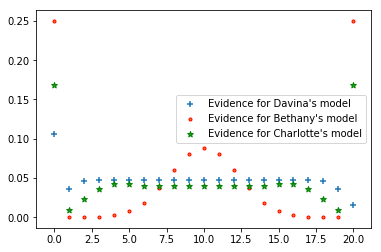

In [108]:
import matplotlib.pyplot as plt

dim = [ i for i in range(21)]     #abscisse x

evidDavina = evidenceDavina()        #ordonnee y correspondante
evidCharlotte = evidenceCharlotte()  #ordonnee y correspondante
evidBethany = evidenceBethany()      #ordonnee y correspondante


p1 = plt.scatter(dim, evidDavina, marker='+', edgecolor='black')
p2 = plt.scatter(dim, evidBethany, marker='.', edgecolor='red')
p3 = plt.scatter(dim, evidCharlotte, marker='*', edgecolor='green')

plt.legend([p1,p2,p3],["Evidence for Davina's model","Evidence for Bethany's model","Evidence for Charlotte's model"])
plt.show()

In [115]:
"""d)Andrew selects 20 balls (with replacement) and 13 are white.
Make a table of the posterior probabilities over the 11 different possibilities under
each model, given the observed data. State also the predictive distribution of the
next ball using the full posterior and also the plug-in MAP estimate for each
model.
"""

def postTableDavina():
    
    prior = np.array([1/11,1/11,1/11,1/11,1/11,1/11,1/11,1/11,1/11,1/11,1/11])
    likelihood =[]
    for i in range(11):
        likelihood.append(combination(20, 13) * np.power(i/10, 13) * np.power(1-i/10, 7))
    evidence = np.sum(likelihood*prior)
    tableDavina = (likelihood * prior) / evidence
    return tableDavina

def postTableCharlotte():
    
    prior = np.array([1/6,0,1/6,0,1/6,0,1/6,0,1/6,0,1/6])
    likelihood =[]
    for i in range(11):
        likelihood.append(combination(20, 13) * np.power(i/10, 13) * np.power(1-i/10, 7))
    evidence = np.sum(likelihood * prior)
    tableCharlotte = likelihood * prior /evidence
    return tableCharlotte

def postTableBethany():
    prior = np.array([1/4,0,0,0,0,1/2,0,0,0,0,1/4])
    likelihood =[]
    for i in range(11):
        likelihood.append(combination(20, 13) * np.power(i/10, 13) * np.power(1-i/10, 7))
    evidence = np.sum(likelihood * prior)
    tableBethany = likelihood*prior/evidence
    return tableBethany

In [122]:
postTableDavina(),print("MAP Estimate: ",np.argmax(postTableDavina()))

MAP Estimate:  6


(array([  0.00000000e+00,   7.78633801e-09,   2.79676219e-05,
          2.13746139e-03,   3.05825945e-02,   1.55251489e-01,
          3.48354866e-01,   3.44952256e-01,   1.14555379e-01,
          4.13797926e-03,   0.00000000e+00]), None)

In [123]:
postTableCharlotte(),print("MAP Estimate: ",np.argmax(postTableCharlotte()))

MAP Estimate:  6


(array([  0.00000000e+00,   0.00000000e+00,   5.66695902e-05,
          0.00000000e+00,   6.19681968e-02,   0.00000000e+00,
          7.05856492e-01,   0.00000000e+00,   2.32118641e-01,
          0.00000000e+00,   0.00000000e+00]), None)

In [124]:
postTableBethany(),print("MAP Estimate: ",np.argmax(postTableBethany()))

MAP Estimate:  5


(array([ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.]), None)